In [47]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json

In [99]:
data = json.load(open("fcla_simple.json","r"))

In [100]:
list(data.keys())

[u'connectivity check time',
 u'dijkstra',
 u'find and enlarge',
 u'iteration init',
 u'fcla initialization',
 u'relative gain',
 u'greedy set cover time',
 u'result final calculation time',
 u'bipartite graph size',
 u'objective',
 u'number of facilities',
 u'left count',
 u'set cover check time',
 u'Created',
 u'capacity of facilities',
 u'prematching time',
 u'facilities left after termination',
 u'reading file',
 u'increase capacity time',
 u'greedy deheap iterations',
 u'augment flow',
 u'make new edge',
 u'total time',
 u'matching count',
 u'lack facility allocation time',
 u'number of iterations',
 u'runtime',
 u'update potentials',
 u'lambda']

In [101]:
dijkstra = data['dijkstra']
dijk_total = sum(dijkstra)
dijk_total

0.048248000000001866

In [102]:
setcov = data['set cover check time']
setcov_tot = sum(setcov)
setcov_tot

0.11336500000000001

In [103]:
inc_cap = data['increase capacity time']
inc_cap_tot = sum(inc_cap)
inc_cap_tot

0.18518999999999997

In [104]:
fae = data['find and enlarge']
fae_tot = sum(fae)
fae_tot

0.10109499999999963

In [105]:
mne = data['make new edge']
mne_tot = sum(mne)
mne_tot

0.026234999999999765

In [106]:
aug_tot = sum(data['augment flow'])

In [107]:
# for set cover
plotdata = {'Total WMA time':data['runtime'],
            'Total execution time':data['total time'],
            "Reading file":data['reading file'],
            "Initialization":data['fcla initialization'],
            'lack facility allocation time': data['lack facility allocation time'],
            'Set Cover time': setcov_tot,
            'Matching': inc_cap_tot + data['prematching time'],
            'Other': data['runtime'] - data['lack facility allocation time'] - 
            setcov_tot - inc_cap_tot + data['prematching time']}
df = pd.DataFrame(plotdata,index=range(1))

In [108]:
df = df.T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:"time"})

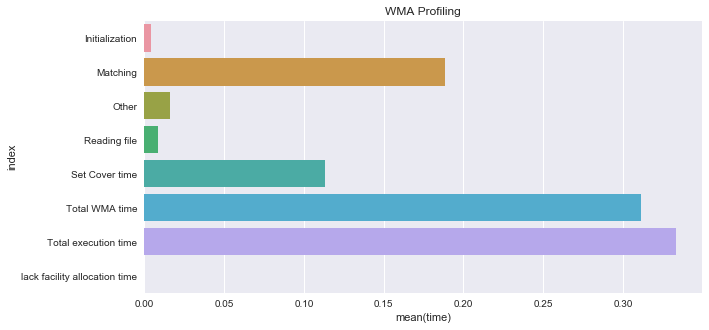

In [109]:
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x="time", y="index",data=df)
plt.title("WMA Profiling")

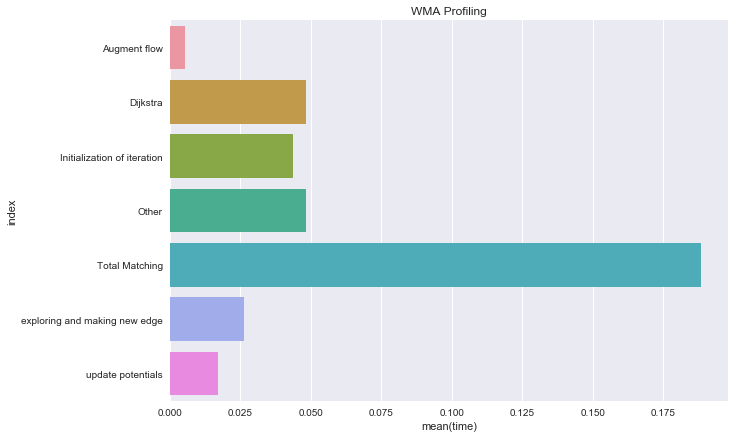

In [110]:
# for matching
plotdata = {'Total Matching':inc_cap_tot + data['prematching time'],
            'Dijkstra': dijk_total,
            'Augment flow': aug_tot,
            'exploring and making new edge': mne_tot,
            'update potentials': sum(data['update potentials']),
            'Initialization of iteration': sum(data['iteration init']),
            'Other': inc_cap_tot + data['prematching time'] - sum(data['iteration init']) 
            - dijk_total - aug_tot - mne_tot - sum(data['update potentials'])}
df = pd.DataFrame(plotdata,index=range(1))
df = df.T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:"time"})
f, ax = plt.subplots(figsize=(10, 7))
sb.barplot(x="time", y="index",data=df)
plt.title("WMA Profiling")

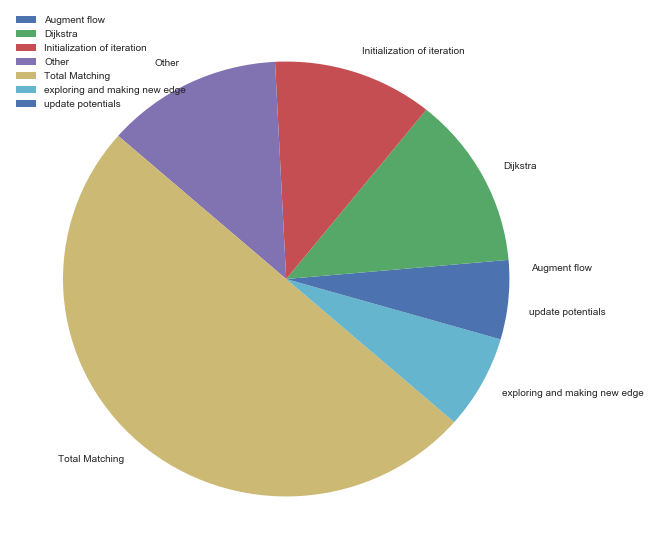

In [111]:
f, ax = plt.subplots(figsize=(10, 10))
plt.pie(df['time']*100,labels=df['index'])
plt.legend()

## Iteration analysis

In [112]:
list(data.keys())

[u'connectivity check time',
 u'dijkstra',
 u'find and enlarge',
 u'iteration init',
 u'fcla initialization',
 u'relative gain',
 u'greedy set cover time',
 u'result final calculation time',
 u'bipartite graph size',
 u'objective',
 u'number of facilities',
 u'left count',
 u'set cover check time',
 u'Created',
 u'capacity of facilities',
 u'prematching time',
 u'facilities left after termination',
 u'reading file',
 u'increase capacity time',
 u'greedy deheap iterations',
 u'augment flow',
 u'make new edge',
 u'total time',
 u'matching count',
 u'lack facility allocation time',
 u'number of iterations',
 u'runtime',
 u'update potentials',
 u'lambda']

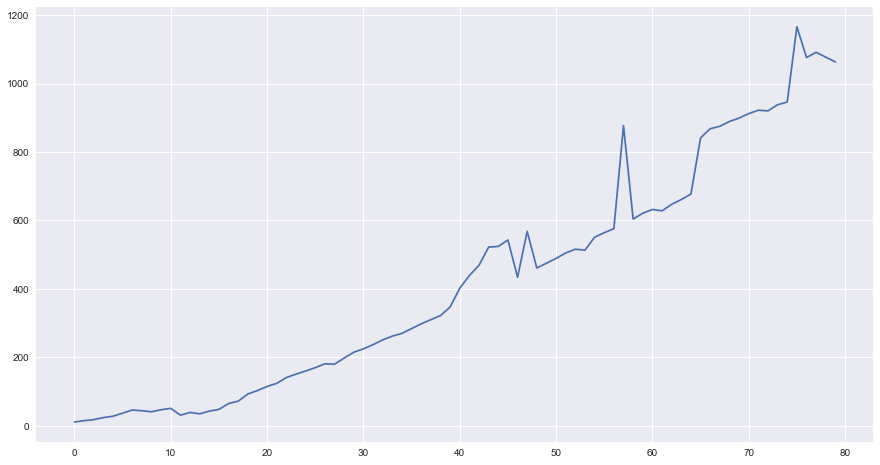

In [113]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['greedy deheap iterations'])
#this is how much to change heap structure.


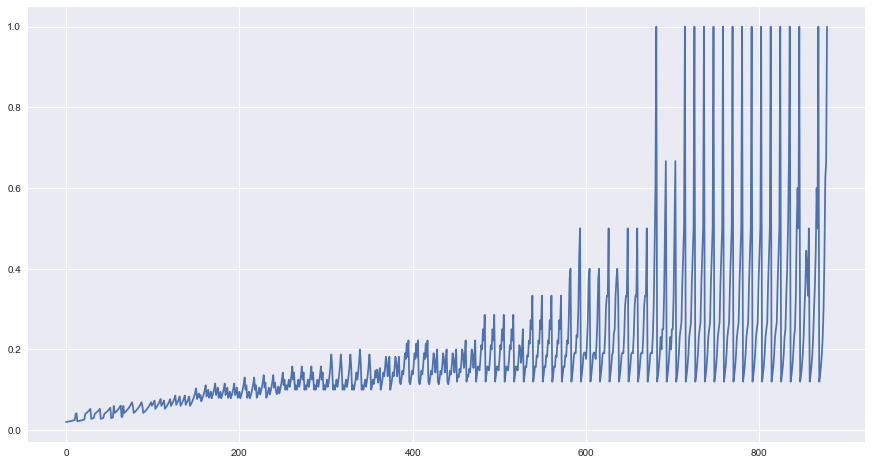

In [114]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['relative gain'])

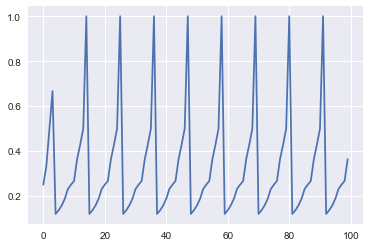

In [115]:
plt.plot(data['relative gain'][700:800])

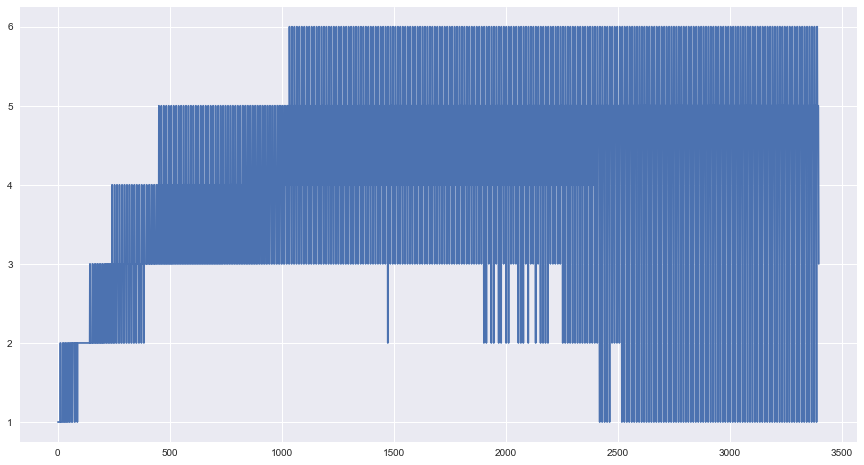

In [42]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['matching count'])

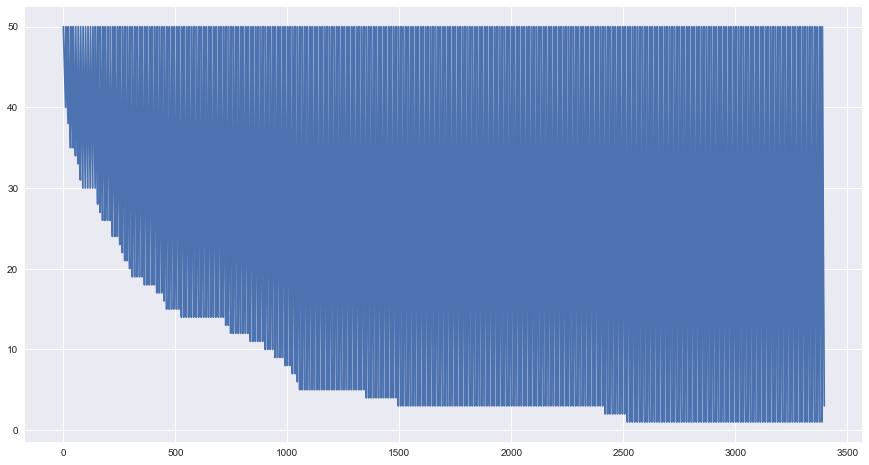

In [43]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['left count'])

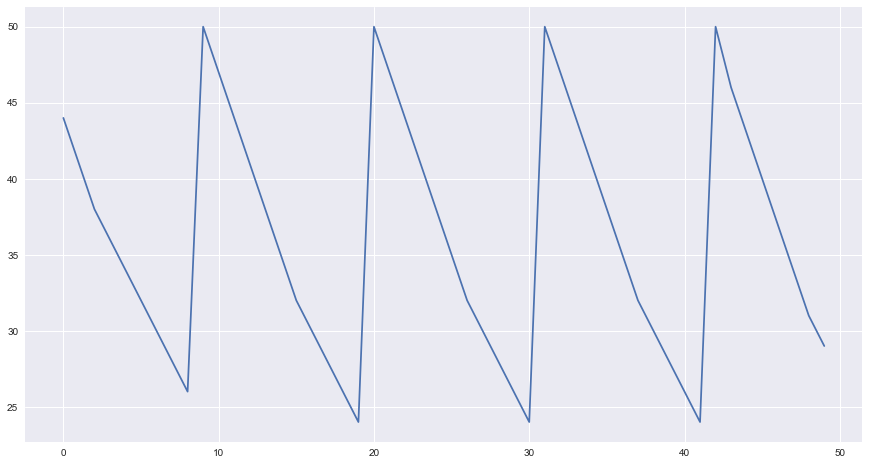

In [44]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['left count'][200:250])

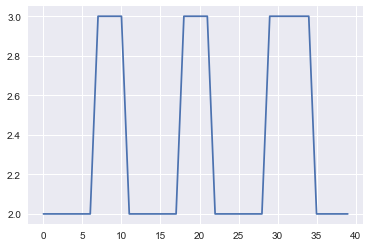

In [45]:
#matching count is number of covered customers by one facility

plt.plot(data['matching count'][180:220])

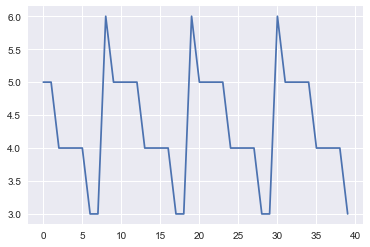

In [46]:
plt.plot(data['matching count'][1180:1220])

# Comparison

In [92]:
res = {}
res['Inc uncovered'] = json.load(open("fcla_incactive.json","r"))['objective']
res['Inc all'] = json.load(open("fcla_simple.json","r"))['objective']
res['Gurobi'] = json.load(open("gurobi.json","r"))['objective']
df = pd.DataFrame(res,index=range(1)).T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:'objective','index':'algorithm'})

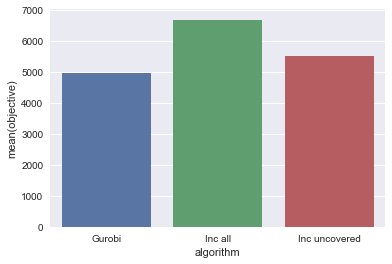

In [94]:
sb.barplot(x="algorithm",y="objective",data=df)

In [90]:
df

,index,0
0,Gurobi,4959
1,Inc all,6679
2,Inc uncovered,5519


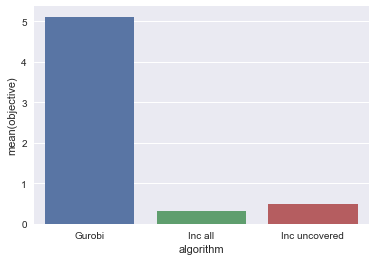

In [98]:
res = {}
res['Inc uncovered'] = json.load(open("fcla_incactive.json","r"))['runtime']
res['Inc all'] = json.load(open("fcla_simple.json","r"))['runtime']
res['Gurobi'] = json.load(open("gurobi.json","r"))['runtime']
df = pd.DataFrame(res,index=range(1)).T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:'objective','index':'algorithm'})
sb.barplot(x="algorithm",y="objective",data=df)